# APS360 Lab 0 - Python and Libraries

### Summary:

Welcome to the first lab of APS360! This lab is
a warm up to get you used to the programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The labs must be done **individually** and even though this lab is not for marks, it is recommended that you get into the practise of working alone.

By the end of this lab, you should be able to:

1. Setup and use Google Colab.
2. Write basic, object-oriented Python code.
3. Be able to perform matrix operations using `NumPy`.
4. Be able to plot using `matplotlib`.
5. Be able to load, process, and visualize data.
6. Be able to perform basic machine learning operations using `Scikit-learn`.

You will need to use NumPy, matplotlib and SciPy. Documentations for there libraries are provided:

* https://docs.scipy.org/doc/numpy/reference/
* https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
* https://scikit-learn.org/stable/supervised_learning.html

You can also reference Python API documentations freely.

### What to submit:

**Nothing!** For future labs you will be required to submit a PDF file containing all your code, outputs, and write-up pertaining to the lab. You can produce a PDF of your Google Colab file by going to `File > Print` and then save as PDF. The Colab instructions has more information.

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

With Colab, you can export a PDF file using the menu option
`File -> Print` and save as PDF file.

## Colab Link

Please make sure to include a link to your colab file here

Colab Link: N/A, for future labs you will be required to provide a link to your Colab file.

# Part 0

# Environmental Setup

Please refer to Colab instructions https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt

If you want to use Jupyter Notebook locally, please refer to https://www.cs.toronto.edu/~lczhang/aps360_20191/files/install.pdf

# Part 1

# Problem: Predicting Titanic Survivors

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

## Problem Background
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In 1997, the story of the Titanic was brought to the big screen and it allowed us to relive the story of two passengers, Jack and Rose, members of  different social classes, who fall in love on the ill-fated passenger liner.

How many of you have seen the movie Titanic?   

Most of you probably were not born when the movie came out, so in case you have not seen it yet, I’m not going to spoil it. In this lab we are going to work with a Titanic dataset to determine what sort of people were likely to survive the disaster. In particular we would like to predict if Jack and Rose would have survived. Afterwards, those of you who have not seen the movie can go and watch it to see if our predictions match the Hollywood story.

## Define the Problem
Our objective is to predict whether or not Jack and Rose would have survived the Titanic tragedy, based on what we know about them from the movie Titanic directed by James Cameron. 

From the movie we can assume the following about Jack and Rose:

* Jack: 3rd class, no siblings, male, 25 years old, no cabin, fare = 7, embarked from Southhampton  
* Rose: 1st class, no siblings, has spouse, 22 years old, cabin, fare = 50,  embarked from Southhampton

To achieve this objective we are provided with historical data obtained after the Titanic tragedy. The historical data is provided as a CSV file containing information on 891 passengers as summarized below:

<pre>
PASSENGER INFORMATION:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
</pre>

### Open Data using Spreadsheet Software

To solve this problem we will start off by investigating the data. We will also be looking at a couple modules namely, numpy, matplotlib and scipy to achieve our objective of predicting passenger survival outcome. To start off let's open the file `train.csv` which you can find on Quercus under Lab 0, or using the following link:

https://drive.google.com/open?id=1aOqkEx5mXBJ5u63NgJ_abRgzVs9awQh9

## Define Test Cases

To validate our predictions we will create test cases with male and female survivors and non-survivors.

  
#### Test Case 1:  Sample Male and Female Survivor
  
|Passenger|PassengerID|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked_Val|
|:--------|:----------|:-----|:--|:--|:----|:----|:---|:-----------|
|Mrs. Laina Heikkinen|3|3|1|26|0|0|7.925|2|
|Master. Michel Navratil|194|2|0|3|1|1|26|2|

#### Test Case 2:  Sample Male and Female Non-Survivor

|Passenger|PassengerID|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked_Val|
|:--------|:----------|:-----|:--|:--|:----|:----|:---|:-----------|
|Miss. Augusta Planke|39|3|1|18|2|0|18|2|
|Mr. Owen Harris Braund|1|3|0|22|1|0|7.25|2|

Once we are confident with the accuracy on accurately predicting survival on our test cases, we can then confidently predict what would happen to Jack and Rose.

#### Test Case 3:  Jack and Rose from the movie Titanic

|Passenger|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked|
|:--------|:-----|:--|:--|:----|:----|:---|:-----------|
|Jack|3|male|25|0|0|7|S|
|Rose|1|female|22|1|0|50|S|



## Loading and Accessing Titanic Dataset

First let's review comma separated value (CSV) files. CSV files are simple text-based files well-suited for organizing spreadsheet data similar. In the CSV format all values are separated by a comma or some unique character. Using the Python csv module we can load our dataset:

In [213]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import csv
with open('train.csv','r') as csvfile:
    data_reader = csv.reader(csvfile)

    data_orig = []
    for row in data_reader:
        data_orig.append(row)


(Optional) If you run into issues loading the file. You can also try the following code.

In [16]:
# link to your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# you will need to load the train.csv file to a folder on your Google Drive

file_dir = '/content/drive/My Drive/APS 360/Labs/Lab 0/' #csv file location

import csv
with open(file_dir + 'train.csv','r') as csvfile:
    data_reader = csv.reader(csvfile)

    data_orig = []
    for row in data_reader:
        data_orig.append(row)

Next we're going to look through our dataset to make sure it was loaded correctly

In [18]:
# display the full dataset
print(data_orig)

[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], ['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C'], ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S'], ['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S'], ['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S'], ['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q'], ['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S'], ['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S'], ['9', '1', '3', 'Johnson, Mrs. Osc

In [19]:
# display the first row (column titles) 
print(data_orig[0])

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [20]:
# display first two samples
print(data_orig[1:3])

[['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']]


In [22]:
# how would you display the last five samples?
print(data_orig[-5:])






[['887', '0', '2', 'Montvila, Rev. Juozas', 'male', '27', '0', '0', '211536', '13', '', 'S'], ['888', '1', '1', 'Graham, Miss. Margaret Edith', 'female', '19', '0', '0', '112053', '30', 'B42', 'S'], ['889', '0', '3', 'Johnston, Miss. Catherine Helen "Carrie"', 'female', '', '1', '2', 'W./C. 6607', '23.45', '', 'S'], ['890', '1', '1', 'Behr, Mr. Karl Howell', 'male', '26', '0', '0', '111369', '30', 'C148', 'C'], ['891', '0', '3', 'Dooley, Mr. Patrick', 'male', '32', '0', '0', '370376', '7.75', '', 'Q']]


In [23]:
# how would you display the first five odd samples?
print(data_orig[1:1+2*5+1:2])






[['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S'], ['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S'], ['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S'], ['9', '1', '3', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', '27', '0', '2', '347742', '11.1333', '', 'S'], ['11', '1', '3', 'Sandstrom, Miss. Marguerite Rut', 'female', '4', '1', '1', 'PP 9549', '16.7', 'G6', 'S']]


In [24]:
# can you find the Master. Michel Navratil, Passenger ID 194?
print(data_orig[194])






['194', '1', '2', 'Navratil, Master. Michel M', 'male', '3', '1', '1', '230080', '26', 'F2', 'S']


### Numpy Module

Numpy provides support for working with multi-dimensional data such as our CSV file. In particular, it has a number of methods for efficient computation of linear algebra equations, provides capability for finding, extracting and/or changing information in multi-dimensional data, and allows for slicing of matrices simulataneously by column and row indices (i.e. using numpy in Python gives functionality similar to MATLAB).

We'll highlight some of these traits as we proceed with our data analysis.

To start we'll load our numpy module and convert our nested list into a numpy array

In [0]:
import numpy as np
data_numpy = np.array(data_orig)

data_numpy now holds all of the Titanic data.

In [26]:
# display numpy dataset
print(data_numpy)

[['PassengerId' 'Survived' 'Pclass' ... 'Fare' 'Cabin' 'Embarked']
 ['1' '0' '3' ... '7.25' '' 'S']
 ['2' '1' '1' ... '71.2833' 'C85' 'C']
 ...
 ['889' '0' '3' ... '23.45' '' 'S']
 ['890' '1' '1' ... '30' 'C148' 'C']
 ['891' '0' '3' ... '7.75' '' 'Q']]


Notice how numpy 2-dimensional data is printed across multiple rows rather than a continuous row as we've seen previously with nested lists.

Since there are a large number of samples, we cannot display all of them at the same time. Instead we can verify the structure of the data by displaying some of the samples at a time. Before we can do that we first need to understand how the numpy comma slicing notation works.

### Numpy Slicing

Slicing in Numpy is done differently from what we've seen so far. To highlight the differences we will compare numpy indexing and slicing of 1-dimensional and 2-dimensional data and compare it to what we did for lists.

#### 1-dimensional data: Indexing and Slicing

To index a list we use square brackets [], and to slice a list we would use a colon operator:

* list_variable[index]  
* list_variable[start:end:step]

The same can be done for numpy:

* numpy_variable[index]  
* numpy_variable[start:end:step]

In [27]:
list_variable = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#list indexing
print(list_variable[2])

#list slicing
print(list_variable[1:8:2])

3
[2, 4, 6, 8]


In [28]:
numpy_variable = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

#numpy array indexing
print(numpy_variable[2])
#numpy array slicing
print(numpy_variable[1:8:2])

3
[2 4 6 8]


#### 2-dimensional data: Indexing and Slicing

To index a 2-dimensional list (nested list) we attach a second set of square brackets []\[\], however we are not able to slice a nested list by row and column simultaneously. 

* list_variable\[index1\]\[index2\]  
* list_variable\[start:end:step\]\[start:end:step\] -> does something completely different  

To index a 2-dimensional numpy array we use the comma notation, which unlike with nested lists, allows us slice a numpy array simultaneously by column and row.

* numpy_variable[index1,index2]  
* numpy_variable[start:end:step, start:end:step]  



In [29]:
list_variable = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]

# nested list indexing
print(list_variable[2][0])

# nested list slicing
print(list_variable[0:2][0]) # creates a list of the first two rows, then gets the first element

9
[1, 2, 3, 4]


In [30]:
numpy_variable = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# 2-d numpy array indexing
print(numpy_variable[2, 0])

# 2-d numpy array slicing
# get the first two entries in the first column
print(numpy_variable[0:2, 0])

9
[1 5]


Now we can go about verifying the format of the data by displaying some of the samples at a time.

In [31]:
# select first row
print(data_numpy[0,:])
print(data_numpy[0])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [32]:
# select first column
print(data_numpy[:,0])

['PassengerId' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97'
 '98' '99' '100' '101' '102' '103' '104' '105' '106' '107' '108' '109'
 '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '120' '121'
 '122' '123' '124' '125' '126' '127' '128' '129' '130' '131' '132' '133'
 '134' '135' '136' '137' '138' '139' '140' '141' '142' '143' '144' '145'
 '146' '147' '148' '149' '150' '151' '152' '153' '154' '155' '156' '157'
 '158' '159' '160' '161' '162' '163' '164' '165' '166' '167' '168' '169'
 '170' '171' '172' '173' '174' '175' '176' '177' '178' '179' '180' 

In [33]:
# select first five columns and rows
print(data_numpy[:5,:5])

[['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex']
 ['1' '0' '3' 'Braund, Mr. Owen Harris' 'male']
 ['2' '1' '1' 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
  'female']
 ['3' '1' '3' 'Heikkinen, Miss. Laina' 'female']
 ['4' '1' '1' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'female']]


For our purposes it is not necessary to transpose the matrix as numpy allows for slicing columns and rows simultaneously.  

If we did need to apply a transform, it can be done relatively easily using the numpy transpose methods as shown:

In [34]:
print(data_numpy.transpose())

[['PassengerId' '1' '2' ... '889' '890' '891']
 ['Survived' '0' '1' ... '0' '1' '0']
 ['Pclass' '3' '1' ... '3' '1' '3']
 ...
 ['Fare' '7.25' '71.2833' ... '23.45' '30' '7.75']
 ['Cabin' '' 'C85' ... '' 'C148' '']
 ['Embarked' 'S' 'C' ... 'S' 'C' 'Q']]


## Back to Predicting Passenger Survival

Let's get back to our original goal which is to predict whether Rose and Jack survive the Titanic disaster.

In order to do that we will need to examine the dataset in more detail. For example, perhaps there is a correlation between survival likelihood and particular passenger information, such as gender, class, age, etc. 

As a first step, we can try to determine how many males and females survived and how many did not. How can we do that?

* one approach is to iterate through the passengers and create 4 accumulator variables to keep the counts:
  1.   males_survived
  2.   males_not_survived
  3.   females_survived
  4.   females_not_survived

Hmmm... What if we wanted to compare the survival across classes. There are three classes and two states of survival, hence we would need 6 accumulator variables to capture all the combinations. Certainly there has to be a better way to do this than writing code for each situation.

* Another option might be to keep track of indices of a particular feature, along with the indices of survival states. Once we have the indicies, we can find the indicies common to both lists and get our counts that way.

Turns out this can be done relatively easily with numpy if we know which method to use.

### Obtaining Indices using Numpy

Finding indices of specific values or range of values can be done using the np.where() method. 

numpy.where(condition[, x, y])  
* Return elements, either from x or y, depending on condition.
* If only condition is given, return indices where condition is True.

Since we're only interested in obtaining indices, we'll only provide a one argument to the method which will return two arrays (of the same size) corresponding to the row and column indices where the condition is true. For example:

In [35]:
numpy_data = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('numpy_data:\n', numpy_data, '\n')

# obtain indicies with values > 7
indices = np.where(numpy_data > 7)

# display row and column indices
print('all indices:', indices, '\n')

# display row indices
print('row indices:', indices[0], '\n')

# display column indices
print('col indices:', indices[1], '\n')

numpy_data:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

all indices: (array([1, 2, 2, 2, 2]), array([3, 0, 1, 2, 3])) 

row indices: [1 2 2 2 2] 

col indices: [3 0 1 2 3] 



Note that the entries that are greater than 7 are: (1,3), (2,0), (2,1), (2,2), (2,2), and (2,3).

Let's apply this now to find indices in our data.

In [36]:
# obtain index of column with title 'Sex'
sex_index = np.where(data_numpy[0,:] == 'Sex')

# print indices
print(sex_index)
print(sex_index[0])

# print value at index found
print(data_numpy[0,sex_index[0]])

(array([4]),)
[4]
['Sex']


In [133]:
# get indices of all male passengers
indices_male = np.where(data_numpy[1:,sex_index[0][0]] == 'male')
print(indices_male[0])

# display the number of male passengers
print(len(indices_male[0]))

# compute percentage of male passengers
percent = 100*len(indices_male[0])/len(data_numpy[:,sex_index])
print(round(percent,2), '% male passengers')

[  0   4   5   6   7  12  13  16  17  20  21  23  26  27  29  30  33  34
  35  36  37  42  45  46  48  50  51  54  55  57  59  60  62  63  64  65
  67  69  70  72  73  74  75  76  77  78  80  81  83  86  87  89  90  91
  92  93  94  95  96  97  99 101 102 103 104 105 107 108 110 112 115 116
 117 118 120 121 122 124 125 126 127 129 130 131 134 135 137 138 139 143
 144 145 146 148 149 150 152 153 154 155 157 158 159 160 162 163 164 165
 168 169 170 171 173 174 175 176 178 179 181 182 183 185 187 188 189 191
 193 196 197 200 201 202 203 204 206 207 209 210 212 213 214 217 219 220
 221 222 223 224 225 226 227 228 231 232 234 236 238 239 242 243 244 245
 248 249 250 252 253 260 261 262 263 265 266 267 270 271 273 277 278 280
 281 282 283 284 285 286 287 288 292 294 295 296 298 301 302 304 305 308
 313 314 317 320 321 324 326 331 332 333 335 336 338 339 340 342 343 344
 348 349 350 351 352 353 354 355 360 361 363 364 365 370 371 372 373 377
 378 379 382 384 385 386 388 390 391 392 395 397 39

In [38]:
# what is the percentage of female passengers?

# get indices of all female passengers
indices_female = np.where(data_numpy[1:,sex_index[0][0]] == 'female')
print(indices_female[0])

# display the number of female passengers
print(len(indices_female[0]))

# compute percentage of female passengers
percent = 100*len(indices_female[0])/len(data_numpy[:,sex_index])
print(round(percent,2), '% female passengers')

[  1   2   3   8   9  10  11  14  15  18  19  22  24  25  28  31  32  38
  39  40  41  43  44  47  49  52  53  56  58  61  66  68  71  79  82  84
  85  88  98 100 106 109 111 113 114 119 123 128 132 133 136 140 141 142
 147 151 156 161 166 167 172 177 180 184 186 190 192 194 195 198 199 205
 208 211 215 216 218 229 230 233 235 237 240 241 246 247 251 254 255 256
 257 258 259 264 268 269 272 274 275 276 279 289 290 291 293 297 299 300
 303 306 307 309 310 311 312 315 316 318 319 322 323 325 327 328 329 330
 334 337 341 345 346 347 356 357 358 359 362 366 367 368 369 374 375 376
 380 381 383 387 389 393 394 396 399 402 404 409 412 415 416 417 419 423
 426 427 431 432 435 436 437 440 443 446 448 457 458 469 472 473 474 479
 483 485 486 496 498 501 502 503 504 506 513 516 518 520 523 526 530 533
 534 535 537 539 540 541 542 546 554 556 558 559 564 567 571 573 576 577
 578 580 581 585 591 593 596 600 608 609 610 612 615 617 618 627 634 635
 638 641 642 644 649 651 653 654 657 669 670 677 67

Let us now use the numpy module to calculate the percentage of males and females that survived. To start we need to find the indices of the survivors, then we can move on to find the indices of the male and female passengers. 

Hmmm, which column was "Survived" again?

In [39]:
# obtain index of column with title 'Survived'
survived_index = np.where(data_numpy[0,:] == 'Survived')
print(survived_index[0])

[1]


To make it easier to search by field name, we can create a dictionary for easy indexing.

In [40]:
# loop through field names and populate a dictionary with indices
fields = {}

# cycle through the first row (i.e. fields) 
for i in range(len(data_numpy[0,:])):
    fields[data_numpy[0, i]] = i

print(fields)

{'PassengerId': 0, 'Survived': 1, 'Pclass': 2, 'Name': 3, 'Sex': 4, 'Age': 5, 'SibSp': 6, 'Parch': 7, 'Ticket': 8, 'Fare': 9, 'Cabin': 10, 'Embarked': 11}


Now we can use the dictionary to quickly obtain the index of the filed we are intersted in searching.

Let's find the percentage of male passengers that survived

In [0]:
# get indices for male passengers
field1 = 'Sex'
field1_val = 'male'
male_indices = np.where(data_numpy[0:,fields[field1]] == field1_val)
male_indices = list(male_indices[0])

# get indices for surviving passengers
field2 = 'Survived'
survived_indices = np.where(data_numpy[0:,fields[field2]] == '1')
survived_indices = list(survived_indices[0])

Now that we have a list of indices of passengers that survived, and a separate list of indices for the ones that are males, how can we use that information to find the number of male survivors?

There are a couple ways we could do this. One option is to convert our lists of indices into sets and take advantage of the set intersection method/operator (i.e. &).

In [42]:
# compute percentage that survived
percent = 100*len(set(male_indices) & set(survived_indices))/len(male_indices)
print(round(percent,2), '% of', field1_val, 'passengers survived')

18.89 % of male passengers survived


We could do the same thing to find the percentage of female passengers that survived or even to find the percentage of first class, female passengeres who survived. But doing this would seem like a lot of code for each combination of characteristics. Why not write a function that generalizes?

We are given some number characteristics (A, B, C) (e.g., A could be male, B could be first class, etc) and we want to find out the percentage of passengers with all of those characteristics that survived. The little algorithm we could write is:

- find ind_A (the indices with characteristic A), ind_B, and ind_C and intersect them to form ind_characteristics
- find ind_survived (the indices of all passengers who survived)
- the length of ind_survived intersected with ind_characteristics divided by the length of ind_survived gives the proportion of surivors

Since we want to be able to do this with any number of characteristics, lets put them in a list.


In [43]:
def get_survival(characteristics):
    """Return the percentage of passengers with the (field, value) entries in 
       characteristics that survived.
       characteristics is a list of the form [(field, value), (field, value), ...]
    """
    indices = set()
    for i in range(len(characteristics)):
        # get search category
        field = characteristics[i][0]
        
        # get value to search for
        val = characteristics[i][1]
        
        # find the matching indices
        new_indices = set(list(np.where(data_numpy[0:,fields[field]] == val)[0]))
        
        # intersect
        if len(indices) == 0:
            indices = new_indices
        else:
            indices &= new_indices
            
    # find the indices of the survivors    
    indices_survived = set(list(np.where(data_numpy[0:,fields["Survived"]] == "1")[0]))
        
    return 100*len(indices_survived & indices)/len(indices)

percent = get_survival([("Sex", "male")])
print(round(percent,2), '% of male passengers survived')

18.89 % of male passengers survived


Now we can easily do the same thing for other combinations.

In [44]:
# find the percentage of female passengers that survived

percent = get_survival([("Sex", "female")])
print(round(percent,2), '% of female passengers survived')

74.2 % of female passengers survived


How about we combine gender and class to see how many first class males survived compared to other classes. How could we do that?

In [45]:
# find the percentage of  male class 1 passengers that survived

percent = get_survival([("Sex", "male"), ("Pclass", "1")])
print(round(percent,2), '% of first class male passengers survived')

36.89 % of first class male passengers survived


In [46]:
# find the percentage of  female class 1 passengers that survived

percent = get_survival([("Sex", "female"), ("Pclass", "1")])
print(round(percent,2), '% of first class female passengers survived')

96.81 % of first class female passengers survived


Let's now use the passenger gender and class to improve our prediction.

#### Test Case 1:  Sample Male and Female Survivor
  
|Passenger|PassengerID|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked_Val|
|:--------|:----------|:-----|:--|:--|:----|:----|:---|:-----------|
|Mrs. Laina Heikkinen|3|3|1|26|0|0|7.925|2|
|Master. Michel Navratil|194|2|0|3|1|1|26|2|


#### Test Case 2:  Sample Male and Female Non-Survivor

|Passenger|PassengerID|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked_Val|
|:--------|:----------|:-----|:--|:--|:----|:----|:---|:-----------|
|Miss. Augusta Planke|39|3|1|18|2|0|18|2|
|Mr. Owen Harris Braund|1|3|0|22|1|0|7.25|2|

In [47]:
# Estimate survival likelihood of the test case passengers and comment on the accuracy of the findings

# Mrs. Laina Heikkinen (female, class 3) -> survivor
percent = get_survival([("Sex", "female"), ("Pclass", "3")])
print("Mrs. Laina Heikkinen had a {} % chance of surviving; she survived".format(round(percent,2)))

# Master. Michel Navratil	(male, class 2) -> survivor
percent = get_survival([("Sex", "male"), ("Pclass", "2")])
print("Master. Michel Navratil had a {} % chance of surviving; he survived".format(round(percent,2)))

# Miss. Augusta Planke (female, class 3) -> non-survivor
percent = get_survival([("Sex", "female"), ("Pclass", "3")])
print("Miss. Augusta Planke had a {} % chance of surviving; she did not survive".format(round(percent,2)))

# Mr. Owen Harris Braund (male, class 3) -> non-survivor
percent = get_survival([("Sex", "male"), ("Pclass", "3")])
print("Mr. Owen Harris Braund had a {} % chance of surviving; he did not survive".format(round(percent,2)))

'''
Females in class 3 had a 50-50 chance of surviving and the test cases give 1 survivor and non-survivor.
Males, regardless of class (but those in a higher class will have a higher chance of surviving), had a low
chance of surviving but the test cases shows that a class 2 male did survive and a class 3 male did not.
'''

Mrs. Laina Heikkinen had a 50.0 % chance of surviving; she survived
Master. Michel Navratil had a 15.74 % chance of surviving; he survived
Miss. Augusta Planke had a 50.0 % chance of surviving; she did not survive
Mr. Owen Harris Braund had a 13.54 % chance of surviving; he did not survive


'\nFemales in class 3 had a 50-50 chance of surviving and the test cases give 1 survivor and non-survivor.\nMales, regardless of class (but those in a higher class will have a higher chance of surviving), had a low\nchance of surviving but the test cases shows that a class 2 male did survive and a class 3 male did not.\n'

# Part 2

# Problem: Visualizing Titanic Dataset

This part will focus on visualizing the data to find patterns that may allow us to make a prediction on who would survive the Titanic tragedy.

Python has many modules available dealing with visualization. One of the most popular to use is the **matplotlib module** which replicates the plotting capability of MATLAB (matplotlib is short for "MATLAB plotting library). In what is to follow, we will discuss how to import and use this module.

To start we can use the plot() method, which takes an optional format string argument that specifies the color and style of the plotted line. For example, plot(x_values, y_values, 'r--') uses 'r' to specify a red color, and '--' to specify a dashed line. You can find more information on formatting options at the following [link](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).


In [0]:
import matplotlib.pyplot as plt

The program imports the pyplot module from the matplotlib package, renaming matplotlib.pyplot to plt using the **as** keyword. 

The plt.plot() function plots data onto the graph. plot() accepts various arguments. If provided just one list, as in plt.plot(val), plot() uses 0, 1, ... for x values, as in (0, val[0]), (1, val[1]), etc. 

plt.plot() on its own will not display anyting. One needs to call the plt.show() function to displays the graph.

To start let's plot the survival percentages based on gender:

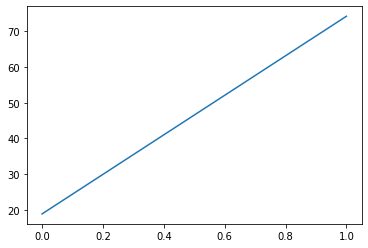

In [3]:
# plot survival by gender
male_survived = 18.9
female_survived = 74.2
survived_percent = [male_survived, female_survived]

# plot survival percentages
plt.plot(survived_percent)
plt.show()

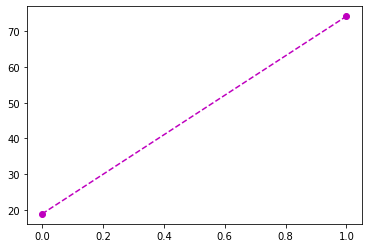

In [4]:
# plot survival with dotted connecting lines
plt.plot(survived_percent, 'm--o')
plt.show()

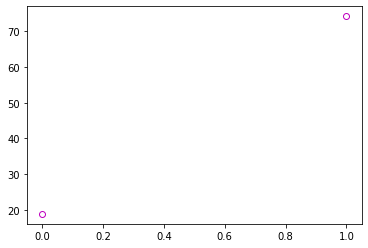

In [5]:
# plot survival without connecting lines
plt.plot(survived_percent, 'mo', markerfacecolor = 'None')
plt.show()

Calling plot multiple times draws multiple lines.

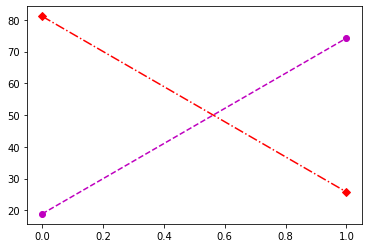

In [6]:
# we can plot percentages of those that survived with overlapping percentages 
# of those that did not survive
survived_percent = [male_survived, female_survived]
n_survived_percent = [100 - male_survived, 100 - female_survived]

plt.plot(survived_percent, 'm--o')
plt.plot(n_survived_percent, 'r-.D')

plt.show()

#### Text and Annotations

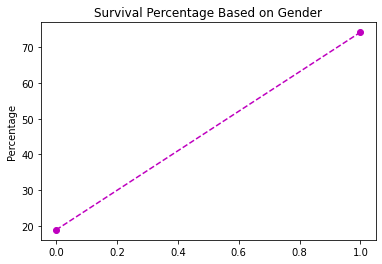

In [8]:
# add title and axis labels
plt.plot(survived_percent, 'm--o')
plt.title('Survival Percentage Based on Gender')
plt.ylabel('Percentage')
plt.show()

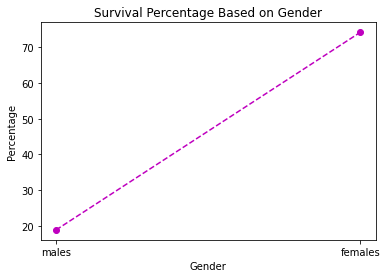

In [9]:
# add tick labels
plt.plot(survived_percent, 'm--o')
plt.xticks([0, 1],['males', 'females'])
plt.title('Survival Percentage Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

Hmmmm, this information would be best represented as a bar graph. Turns out we can do that as well using matlibplot.

#### Bar Graphs - Averaged Data
We can visualize the survival rates using bar graphs as shown:

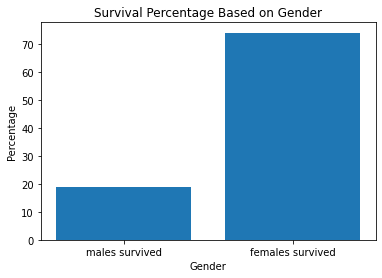

In [10]:
# plot bar graph of survival by gender
pos = [0, 1]
plt.bar(pos, survived_percent, align = 'center')
plt.xticks(pos,['males survived', 'females survived'])
plt.title('Survival Percentage Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

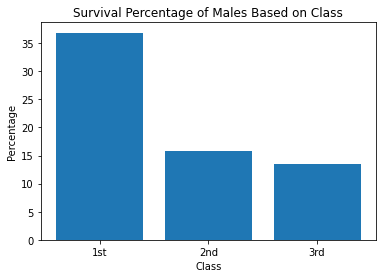

In [11]:
# plot bar graph of survival by class
male_class_survived = [36.88, 15.74, 13.54]


# x axis position of bars graph
pos = range(len(male_class_survived))
# generate bar graph
plt.bar(pos, male_class_survived, align = 'center')
# provide labels for each bar based on provided positions
plt.xticks(pos,['1st', '2nd', '3rd'])
plt.title('Survival Percentage of Males Based on Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

**(optional) We can also use subplots to plot everything together. In your spare time see if you can plot the percentage of male and female survivors using subplots.**

Text(0.5, 1.0, 'Female')

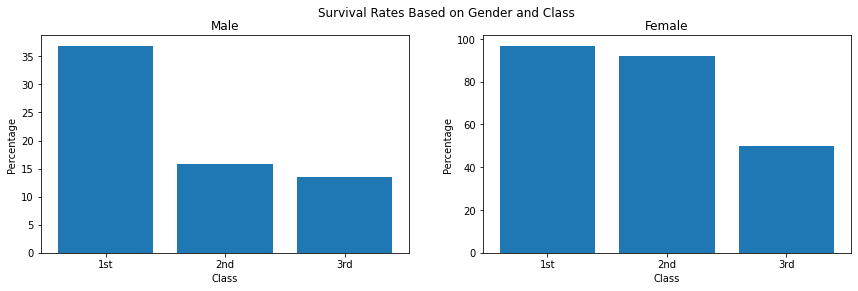

In [103]:
# (optional) use subplots to show male and female survivors by class

# calculate male survival rates
male_class_survived = [round(get_survival([("Sex", "male"), ("Pclass", "1")]), 2),
                       round(get_survival([("Sex", "male"), ("Pclass", "2")]), 2),
                       round(get_survival([("Sex", "male"), ("Pclass", "3")]), 2)]

# calculate female survival rates
female_class_survived = [round(get_survival([("Sex", "female"), ("Pclass", "1")]), 2),
                         round(get_survival([("Sex", "female"), ("Pclass", "2")]), 2),
                         round(get_survival([("Sex", "female"), ("Pclass", "3")]), 2)]

# x positions of bar graphs
pos = [0, 1, 2]

# generate figure
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(right=2)
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle("Survival Rates Based on Gender and Class", x = mid)
plt.setp(axes, xticks=pos, xticklabels=['1st', '2nd', '3rd'], xlabel="Class", ylabel="Percentage")

# plot male survivial rates
axes[0].bar(pos, male_class_survived, align = 'center')
axes[0].set_title('Male')

# plot female survivial rates
axes[1].bar(pos, female_class_survived, align = 'center')
axes[1].set_title('Female')

What if we wanted to plot an entire column? For example, we could print the ages of all the passengers.

#### Numpy: Converting Column of str to int
When we loaded our data all the values were converted into strings because unlike lists numpy arrays can be of only one type (i.e. string or float, not both). This is somewhat problematic as we cannot plot strings, we need numerical values. We need to fix our dataset before we can plot it. How might we do that?

If we want to plot the age of passengers we need to apply the following steps:

1. Select the age column
2. find all the missing ages and replace them with a numerical value (i.e. np.nan)
3. convert the numpy array into a float

Selecting the age column is something we've done, but what about finding and overwriting data? One option could be to find the indicies that are blank and overwrite them. There is an easier way to do this.

Turns out we can also select numpy data by value using conditionals. For examples:
    
    x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

    x[x >= 5]
    
Will select only the data that is greater than or equal to 5 in a numpy array x.

We can take this further by assigning that data a particular value.

    x[x >= 5] = 100

Will select only the data greater than or equal to 5 and change the value to 100.

In [104]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(x[x >= 5])
x[x >= 5] = 100
print(x)

[5 6 7 8 9]
[  1   2   3   4 100 100 100 100 100]


Now we can use the same technique to update our age data to numerical values.

In [105]:
# select the age of passengers
index = fields['Age']
age = data_numpy[1:, index]

# find the ones that are empty and make them nan
age[age == ''] = np.nan

# convert all the strings into floats
age = age.astype(float)

# verify conversion to float
print(age)

[22.   38.   26.   35.   35.     nan 54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.     nan 31.     nan 35.   34.   15.   28.
  8.   38.     nan 19.     nan   nan 40.     nan   nan 66.   28.   42.
   nan 21.   18.   14.   40.   27.     nan  3.   19.     nan   nan   nan
   nan 18.    7.   21.   49.   29.   65.     nan 21.   28.5   5.   11.
 22.   38.   45.    4.     nan   nan 29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.     nan   nan  0.83 30.   22.   29.     nan 28.
 17.   33.   16.     nan 23.   24.   29.   20.   46.   26.   59.     nan
 71.   23.   34.   34.   28.     nan 21.   33.   37.   28.   21.     nan
 38.     nan 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.     nan 32.5  32.5  54.   12.     nan 24.     nan 45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.     nan 22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5    nan 51.
 16.   30.     nan   nan 44.   40.   26.   17.    1.    9.     nan 45.


By making the missing data of type nan (not a number), plot will ignore those values when plotting age values.

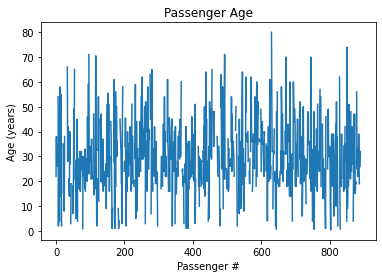

In [106]:
# plot age
plt.plot(age)
plt.title('Passenger Age')
plt.xlabel('Passenger #')
plt.ylabel('Age (years)')
plt.show()

Since we don't care about the sequence of the age of passengers, it may be more informative to see how many passengers we have within each age group, i.e. plot a histogram of our data.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


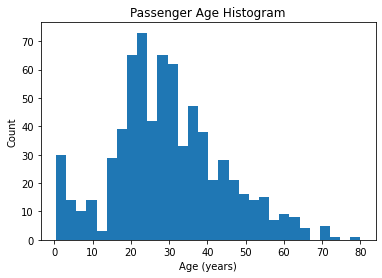

In [109]:
plt.hist(age, bins=30)
plt.title('Passenger Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

Hmmmm, seems like we obtain a histogram for nan values. How can we fix this? Let's search on Google to see if anyone else has had this problem. A quick search reveals the following stackoverflow discussion [(link)](http://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array).

    x = x[numpy.logical_not(numpy.isnan(x))] 

or   

    x = x[~numpy.isnan(x)]

This is actually the same as: 

    x = x[numpy.isnan(x) == 0]

Let's use this to select all age values excluding the nan type.

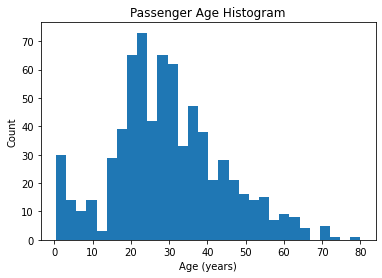

In [108]:
# plot a histogram of passenger ages excluding nan values
# to plot the histogram we need to exclude the missing ages, i.e. nan values
# the np.isnan() method returns True for values that are of type nan
plt.hist(age[np.isnan(age) == 0], bins=30)
plt.title('Passenger Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

**(Optional) As another exploration activity, it might be useful to see how survival changes with age. To do that it might be helpful to plot the survivor and non-survivor age histograms overtop of each other. Hmmm, how might we do that?** [(Hint)](http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib)

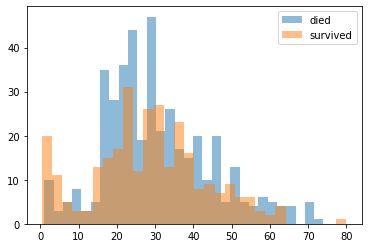

'\nThis shows us that kids were given first priority for lifeboats.\n'

In [212]:
# (Optional) plot a histogram of passenger ages excluding nan values and overlap survivors and non-survivors. Does this provide any insight into the data?

# lists to hold ages
survived = []
died = []

# determine if each person survived or died
for id in range(1,len(age)+1):
  fate = data_numpy[id, fields['Survived']]
  if (fate.astype(int) == 1):
    survived += [age[id-1]]
  else:
    died += [age[id-1]]

# convert to numpy arrays
survived = np.array(survived)
died = np.array(died)

# plot histograms
plt.hist(died[np.isnan(died) == 0], bins=30, alpha=0.5, label='died')
plt.hist(survived[np.isnan(survived) == 0], bins=30, alpha=0.5, label='survived')
plt.legend(loc='upper right')
plt.show()

'''
This shows us that kids were given first priority for lifeboats.
'''

Including age with the class and gender may benefit our predictions on the test cases. It would take some work to implement this change. It may be a good idea to pause and reconsider our approach continuing any further.

In the next part we will discuss how to take the information we have gained about our dataset to apply commonly used machine learning algorithms to predict passenger survival outcome.

# Part 3

# Problem: Predicting Titanic Survivors

After visualizing the data in the previous part, we can see that the odds of surviving vary depending on passenger information such as: age, sex, class. Is there some way we can use all our passenger information to predict survival?

In this part we will take a look at how to use the readily available machine learning algorithms to make predictions on survival.

The machine learning community has grown substantially over the years and there are many modules available to implement the different algorithms. To implement the algorithms, all we need to do is obtain a dataset and arrange it to follow the machine learning conventions which can be described by the following algorithm plan:

### End-to-End Machine Learning Project:

* Look at the big picture
+ Get the data
+ Visualize the data to gain insights
+ Preprocess (clean) data to ensure all values are numerical
+ Divide dataset into a training and testing set
+ Select machine learning model and train it
+ Perform prediction on the testing data
+ Evaluate prediction performance of machine learning algorithm (use new data or holdout set to be sure of performance)

Note that we've already completed steps 1 - 3 and we've already done a bit of work on step 4 when we ploted age of passengers.

#### Replace strings and missing values with numbers

As part of the data structure we require that all the samples are numerical. We need to prepare data by removing strings and filling in missing values.

As we saw previously, we can select numpy data by value using conditionals. For examples:

    x[numpy.isnan(x) == 0]

Will select only the data that is not of type nan. Similarly,

    x[x >= 5]
    
Will select only the data that is greater than or equal to 5 in a numpy array x.

We can take this further by assigning that data a particular value. For example:

    x[x >= 5] = 100

Will select only the data greater than or equal to 5 and change the value to 100.

In [216]:
# any value >= 5 will be replaced with 100
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x[x >= 5] = 100

print(x)

[  1   2   3   4 100 100 100 100 100 100 100 100]


Now let's use that to fix our data to only hold numerical values.

Let's put everything together into a class data structre and test. **Make sure that the trian.csv file is loaded.**

In [214]:
# Helper Titanic_Data Class

# Correct values in Survival, Gender, Embarked, and Age columns
import csv
import numpy as np

class Titanic_Data:
    """Titanic data set"""
    
    def __init__(self, Filename):
        """load Titanic data set"""
        with open(Filename,'r') as csvfile:
            data_reader = csv.reader(csvfile)
            data_orig = []
            for row in data_reader:
                data_orig.append(row)
        
        # loop through field names and populate a dictionary with indices
        fields = {}
        for i in range(len(data_orig[0])):
            fields[data_orig[0][i]] = i
        
        # exclude the first row when preparing the numpy data structure
        self.data = np.array(data_orig[1:])
        self.fields = fields
    
    def get_survival(self, characteristics):
        """Return the percentage of passengers with the (field, value) entries in 
           characteristics that survived.
           characteristics is a list of the form [(field, value), (field, value), ...]
        """
        indices = set()
        for i in range(len(characteristics)):
            # obtain search category
            field = characteristics[i][0]
        
            # obtain value to search for
            val = characteristics[i][1]
        
            # find and intersect the matching indices
            new_indices = set(list(np.where(self.data[0:,self.fields[field]] == val)[0]))
        
            # intersect
            if len(indices) == 0:
                indices = new_indices
            else:
                indices &= new_indices
            
        # find the indices of the survivors    
        indices_survived = set(list(np.where(self.data[0:,self.fields["Survived"]] == "1")[0]))
        
        return 100*len(indices_survived & indices)/len(indices)    
   
    def clean_data(self):
        """Converts all data into numerical values 
        (missing data is converted into nan)"""
        self.clean('Sex', ['male', 'female'])
        self.clean('Embarked', ['C', 'Q', 'S'])
        self.clean('Age')
        self.clean('Pclass')
        self.clean('SibSp')
        self.clean('Parch')
        self.clean('Fare')
   
    def clean(self, col_header, values = []):
        """Converts column data into numerical values
        (missing data is convereted into nan)"""
        # select the column
        column = self.data[:,self.fields[col_header]]
        # find the ones that are empty and make them nan
        column[column == ''] = np.nan
        # encode the the strings as numbers
        for i in range(len(values)):
            column[column == values[i]] = i
        # overwrite
        self.data[:,self.fields[col_header]] = column
   
    def keep_columns(self, L):
        """Select Features """           
        feature_data = self.data[:,L]
        feature_data = feature_data.astype(float)
        return feature_data

# call function to prepare data structure
titanic = Titanic_Data('train.csv')
print(titanic.data[0,:])

# cleaned data
titanic.clean_data()
print(titanic.data[0,:])

# remove unnecessary columns and convert array to float
feature_data = titanic.keep_columns([1, 2, 4, 5, 6, 7, 9, 11])
print(feature_data[0,:])


['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
 '7.25' '' 'S']
['1' '0' '3' 'Braund, Mr. Owen Harris' '0' '22' '1' '0' 'A/5 21171' '7.25'
 '' '2']
[ 0.    3.    0.   22.    1.    0.    7.25  2.  ]


#### Divide data into a training and testing dataset

In [0]:
feature_data = titanic.keep_columns([1, 2, 4, 5, 6, 7, 9, 11])

# replace all nan values with -1 to prevent an error
feature_data[np.isnan(feature_data)==1] = -1

# segment data into training and testing datasets (features)
halfway = len(feature_data)//2
training_data = feature_data[0:halfway,1:]
testing_data = feature_data[halfway:,1:]

# segment data into training and testing labels (targets)
training_labels = feature_data[0:halfway,0]
testing_labels = feature_data[halfway:,0]

In [218]:
# verify the training data and labels are correct
print(training_data)
print(training_labels)

[[ 3.      0.     22.     ...  0.      7.25    2.    ]
 [ 1.      1.     38.     ...  0.     71.2833  0.    ]
 [ 3.      1.     26.     ...  0.      7.925   2.    ]
 ...
 [ 3.      0.     25.     ...  0.      7.775   2.    ]
 [ 2.      1.     28.     ...  0.     13.      2.    ]
 [ 3.      0.     -1.     ...  0.      8.1125  2.    ]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 

#### Import a Machine Learning Algorithm
There are many machine learning algorithms developed for making predictions (classification) similar to the one we are trying to do in this design problem. To use these algorithms we first need to import them from the scikit-learn machine learning modules for Python. More information on the different algorithms can be found at the following [link](http://scikit-learn.org/stable/).

There are many machine algorithms to choose from such as:

1. Decision Trees
2. Random Forests
3. Support Vector Machines
4. Naïve Bayes

For now let us focus on the decision trees classifier. We import the classifier and setup some default parameters.


In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

#### Train machine learning algorithm
Next we train our algorithm on the training set. This updates the model parameters to make predictions specific to our data.

In [221]:
model.fit(training_data, training_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Perform prediction on the test cases.
Now that model is trained, we can use it to predict the outcome on our test cases:

#### Test Case 1:  Sample Male and Female Survivor
  
|Passenger|PassengerID|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked_Val|
|:--------|:----------|:-----|:--|:--|:----|:----|:---|:-----------|
|Mrs. Laina Heikkinen|3|3|1|26|0|0|7.925|2|
|Master. Michel Navratil|194|2|0|3|1|1|26|2|

#### Test Case 2:  Sample Male and Female Non-Survivor

|Passenger|PassengerID|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked_Val|
|:--------|:----------|:-----|:--|:--|:----|:----|:---|:-----------|
|Miss. Augusta Planke|39|3|1|18|2|0|18|2|
|Mr. Owen Harris Braund|1|3|0|22|1|0|7.25|2|

We first need to select our testcase samples. We can do that by obtaining the samples from the original feature data by providing their order in the list (i.e. PassengerID).

In [222]:
# select test case 1 and 2 passengers
passenger_ids = np.array([3, 194, 39, 1])
print(passenger_ids-1)
testcase_data = feature_data[passenger_ids-1, 1:]

# display details on selected passengers
print(testcase_data)

# predict survival outcome
testcase_predict = model.predict(testcase_data)
print('Predicted Survival Outcome: ', testcase_predict)

[  2 193  38   0]
[[ 3.     1.    26.     0.     0.     7.925  2.   ]
 [ 2.     0.     3.     1.     1.    26.     2.   ]
 [ 3.     1.    18.     2.     0.    18.     2.   ]
 [ 3.     0.    22.     1.     0.     7.25   2.   ]]
Predicted Survival Outcome:  [1. 1. 0. 0.]


On the above sample we see that our algorithm was able to successfully predict the survival outcome of the passengers in the test cases.

Wait a second... it seems like all our test case samples are also in the training data. The algorithm was trained on the same data, which means they're going to do better on this data than on completely new data (i.e. testing_data).

Let's compare the prediction on the training_data and testing_data to get a proper validation of prediction performance.

In [223]:
# predict the first 10 training samples and compare to the actual survival outcomes
print('Training Sample Labels:     ', training_labels[0:10])
sample_predict = model.predict(training_data[0:10,:])
print('Predicted Survival Outcome: ', sample_predict)

Training Sample Labels:      [0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
Predicted Survival Outcome:  [0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


Seems like the prediction worked well on the training samples. How about the testing samples.

In [224]:
# test on the first 10 testing samples and compare to the actual survival outcomes
print('Testing Sample Labels:      ', testing_labels[0:10])
sample_predict = model.predict(testing_data[0:10,:])
print('Predicted Survival Outcome: ', sample_predict)

Testing Sample Labels:       [1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]
Predicted Survival Outcome:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Already we see that some of the predictions were not correct.

#### Evaluate performance by computing the percentage of correctly predicted survival outcomes.
To get a true evaluation of performance we need to test on a larger set of data. Let's predict the outcome on all of the testing data and compute a percentage of how many survival outcomes were correctly predicted.

In [225]:
# obtain survival predictions on all testing data
testing_predicted = model.predict(testing_data)

# obtain a percentage score of performance on all testing data
score = 100*(1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))
print('Testing data performance', score, '% correctly predicted')

Testing data performance 77.57847533632287 % correctly predicted


How does that compare with the samples obtained from the training data?

In [226]:
# obtain survival predictions on all training data
training_predicted = model.predict(training_data)

# obtain a percentage score of performance on all training data
score = 100*(1-sum(abs(training_predicted-training_labels))/len(training_predicted))
print('Training data performance', score, '% correctly predicted')

Training data performance 85.39325842696628 % correctly predicted


The prediction achieved better performance, 85.4% on the training data than the testing data 77.6%. This makes sense because the machine learning algorithms are trying to model the training data not the testing data.  

Let's see if we can get better performance by adjusting the training parameters (i.e. max_depth) and applying other machine learning algorithms.

### Compare Prediction Performance Across Machine Learning Algorithms 

As a final step we will adjust our training parameters and machine learning algorithms to see if we can do any better on the survival prediction performance.

Test **Decision Tree** Learning Algorithm

In [227]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15)

# Fit the model to our training data
model.fit(training_data, training_labels)

# Make predictions
testing_predicted = model.predict(testing_data)
score = 100*(1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))
print("DT Test:", score)

DT Test: 76.00896860986546


There you go, you’ve just implemented a high level prediction in only a couple lines. Since each dataset is different, we may find that there are other algorithms that are better suited for this prediction. Let’s examine some of the other popular machine learning algorithms.

Test **Random Forest** Learning Algorithm

In [228]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)

# Fit the model to our training data
model.fit(training_data, training_labels)

# Make predictions
testing_predicted = model.predict(testing_data)
score = 100*(1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))
print("RF Test:", score)

RF Test: 80.04484304932735


Test **Support Vector Machine** Learning Algorithm

In [229]:
# Support Vector Machines
from sklearn import svm
model = svm.SVC(gamma=2, C=1)

# Fit the model to our training data
model.fit(training_data, training_labels)

# Make predictions
testing_predicted = model.predict(testing_data)
score = 100*(1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))
print("SVM Test:", score)

SVM Test: 61.43497757847533


Test **Naïve Bayes** Machine Learning Algorithm

In [230]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to our training data
model.fit(training_data, training_labels)

# Make predictions
testing_predicted = model.predict(testing_data)
score = 100*(1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))
print("NB Test:", score)

NB Test: 79.82062780269058


These are just a few of the available machine learning algorithms at our disposal. Designing these algorithms would have taken hours of work, fortunately, the Python open source community is strong and many people out there are willing to contribute. Hence, all we have to do is change one or two lines in our code to evaluate.

## Perform Final Testing

From the above algorithms tested, it seems like the Naive Bayes performed the best.  

Now that we have selected our machine learning model for predicting survival, we can finally answer the question of whether or not Jack and Rose would have survived (test case 3). To make this prediction we need to provide information on the passengers in the expected form:

|Passenger|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked|
|:--------|:-----|:--|:--|:----|:----|:---|:-----------|
|Jack|3|0|25|0|0|7|2|
|Rose|1|1|22|1|0|50|2|

Given the provided information about Jack and Rose, would they have survived the tragedy?

In [239]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15)

# Fit the model to our training data
model.fit(training_data, training_labels)

# Create test data (features of Jack and Rose)
test_jack = np.array([3, 0, 25, 0, 0, 7, 2])
test_rose = np.array([1, 1, 22, 1, 0, 50, 2])

testing_predicted = model.predict(test_jack.reshape(1,-1))
print("Jack Survival:", testing_predicted)

testing_predicted = model.predict(test_rose.reshape(1,-1))
print("Rose Survival:", testing_predicted)

Jack Survival: [0.]
Rose Survival: [1.]


Our model **prediction is that Rose would survive and Jack would not**. You should watch the movie to find out if the prediction is correct.

### Discussion
Given that the accuracy for all of our models is maxing out around 80%, it will be interesting to look at specific passengers for whom these prediction algorithms are incorrect. Provided is a list of some of the passengers that were incorrectly predicted: 

#### Allison family
For instance, three incorrectly classified passengers are members of the Allison family, who perished even though the model predicted that they would survive. These first class passengers were very wealthy, as can be evidenced by their far-above-average ticket prices. For Betsy (25) and Loraine (2) in particular, not surviving is very surprising, considering that we found earlier that over 96% of first class women lived through the disaster.  

So what happened? A surprising amount of information on each Titanic passenger is available online; it turns out that the Allison family was unable to find their youngest son Trevor and was unwilling to evacuate the ship without him. Tragically, Trevor was already safe in a lifeboat with his nurse and was the only member of the Allison family to survive the sinking.

#### John Jacob Astor
Another interesting example is John Jacob Astor, who perished in the disaster even though the model predicted he would survive. Astor was the wealthiest person on the Titanic, an impressive feat on a ship full of multimillionaire industrialists, railroad tycoons, and aristocrats. Given his immense wealth and influence, which the model may have deduced from his ticket fare (valued at over \$35,000 in 2016 dollars), it seems likely that he would have been among the 35 percent of men in first class to survive. However, this was not the case: although his pregnant wife survived, John Jacob Astor’s body was recovered a week later, along with a gold watch, a diamond ring with three stones, and no less than \$92,481 (2016 value) in cash.

On the other end of the spectrum is Olaus Jorgensen Abelseth, a 25-year-old Norwegian sailor. Abelseth, as a man in 3rd class, was not expected to survive by our classifier. Once the ship sank, however, he was able to stay alive by swimming for 20 minutes in the frigid North Atlantic water before joining other survivors on a waterlogged collapsible boat and rowing through the night. Abelseth got married three years later, settled down as a farmer in North Dakota, had 4 kids, and died in 1980 at the age of 94.


### Conclusions
Initially I was disappointed by the accuracy of our machine learning models maxing out at about 80% for this data set. It’s easy to forget that these data points each represent real people, each of whom found themselves stuck on a sinking ship without enough lifeboats. When we looked into data points for which our model was wrong, we can uncover incredible stories of human nature driving people to defy their logical fate. It is important to never lose sight of the human element when analyzing this type of data set. This principle will be especially important going forward, as machine learning is increasingly applied to human data sets by organizations such as insurance companies, big banks, and law enforcement agencies.


## Take home questions

(1) In performing our testing we have made some fundamental mistakes that results in overfitting to our 4 test cases. Spend some time looking through how we setup our training and testing data, in particular take a look at the test cases. Indicate what the problem is and suggest some ways to correct it.

In [0]:
# correct the above test process and evaluate the performance of the algorithms

# Models are too complex
# decrease depth for decision tree and number of estimators used for forest








(2) Exploration! Compare different machine learning algorithms and data preprocessing to see if you can achieve a better prediction accuracy. How can you be sure that you are not overfitting to the data?

In [0]:
# write your code here














